✅ Librerías importadas y configuradas
📊 Cargando California Housing Dataset...
✅ Dataset cargado exitosamente
• Filas: 20640
• Columnas: 9
• Características: 8
💾 Dataset guardado en: ../data/raw/california_housing.csv
📏 Tamaño del archivo: 1.92 MB

📋 Primeras 5 filas del dataset:
INFORMACIÓN GENERAL DEL DATASET

📊 DIMENSIONES:
• Total de registros: 20,640
• Total de características: 9

🏷️  CARACTERÍSTICAS:
  1. MedInc
  2. HouseAge
  3. AveRooms
  4. AveBedrms
  5. Population
  6. AveOccup
  7. Latitude
  8. Longitude

🎯 VARIABLE OBJETIVO:
  • MedHouseVal: Precio mediano de la casa (en dólares)

📝 TIPOS DE DATOS:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64

🔍 VALORES NULOS:
  ✅ No hay valores nulos en el dataset
ESTADÍSTICAS DESCRIPTIVAS

📈 CARACTERÍSTICAS NUMÉRICAS:

💵 ESTADÍSTICAS DEL PRECIO (MedHouseVal):
  Count: 20,640.0

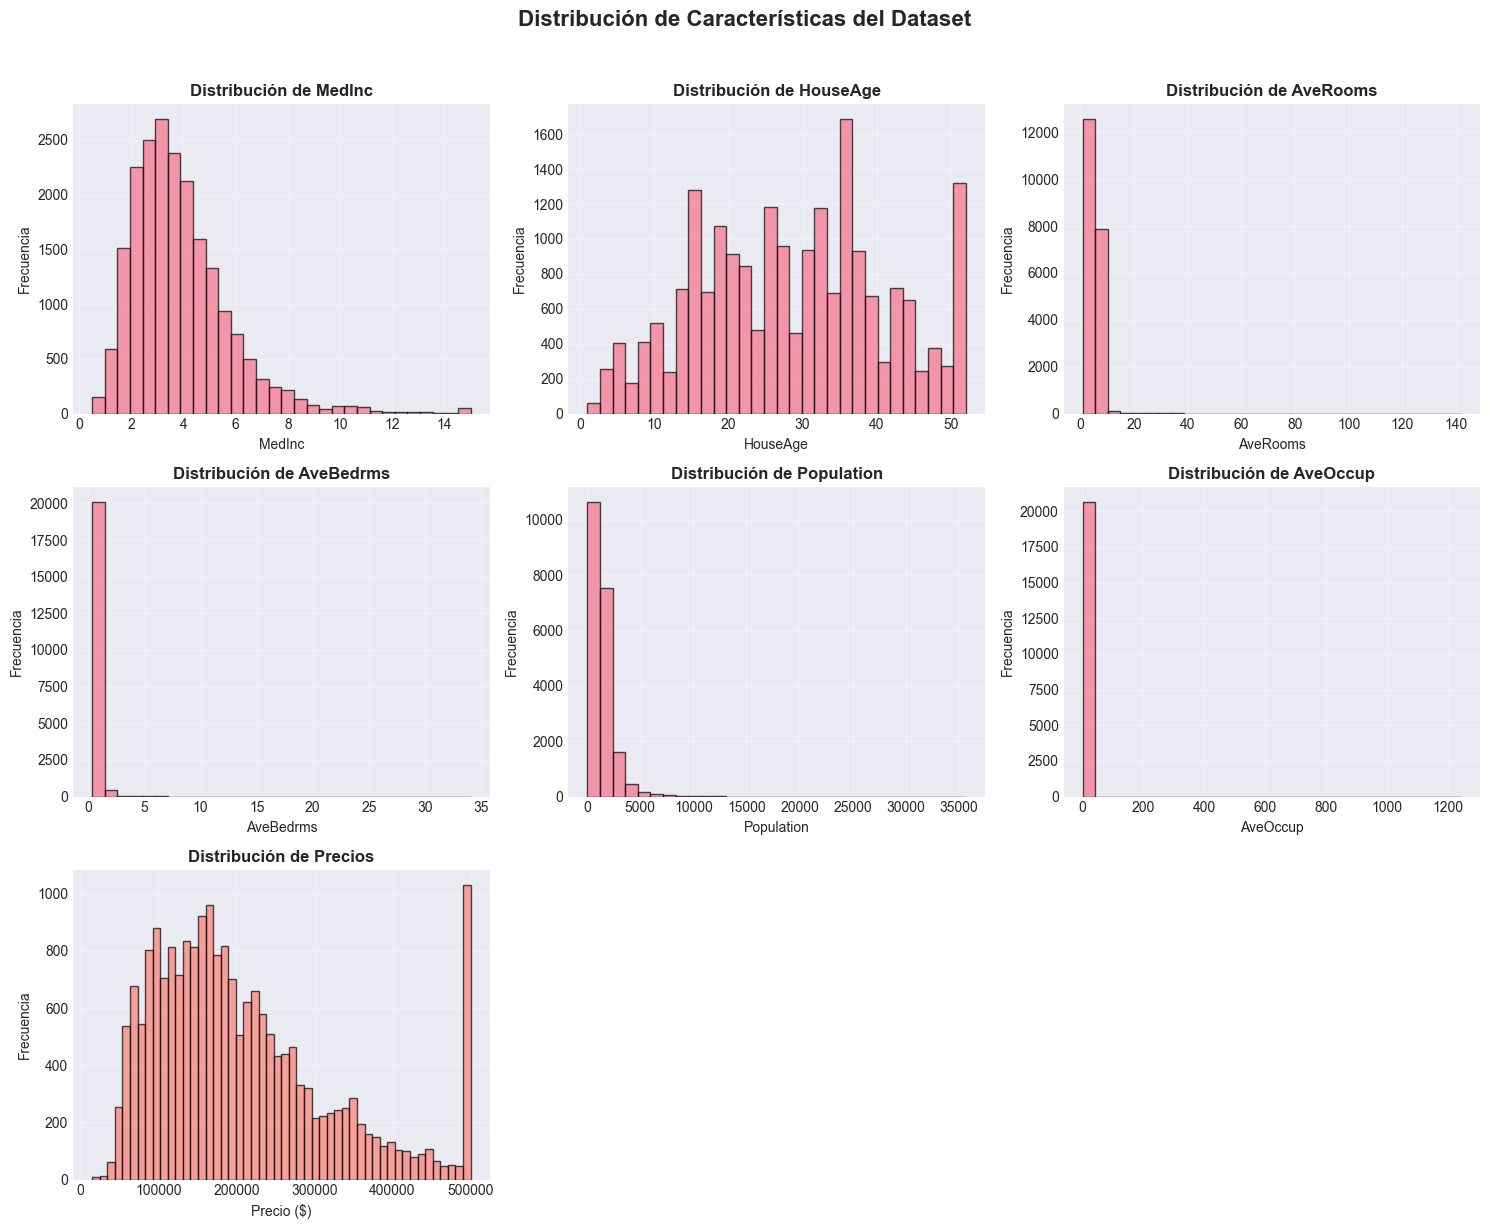

✅ Gráfico de distribuciones guardado en: ../reports/distribuciones_caracteristicas.png
ANÁLISIS DE CORRELACIONES

🔗 MATRIZ DE CORRELACIÓN COMPLETA:


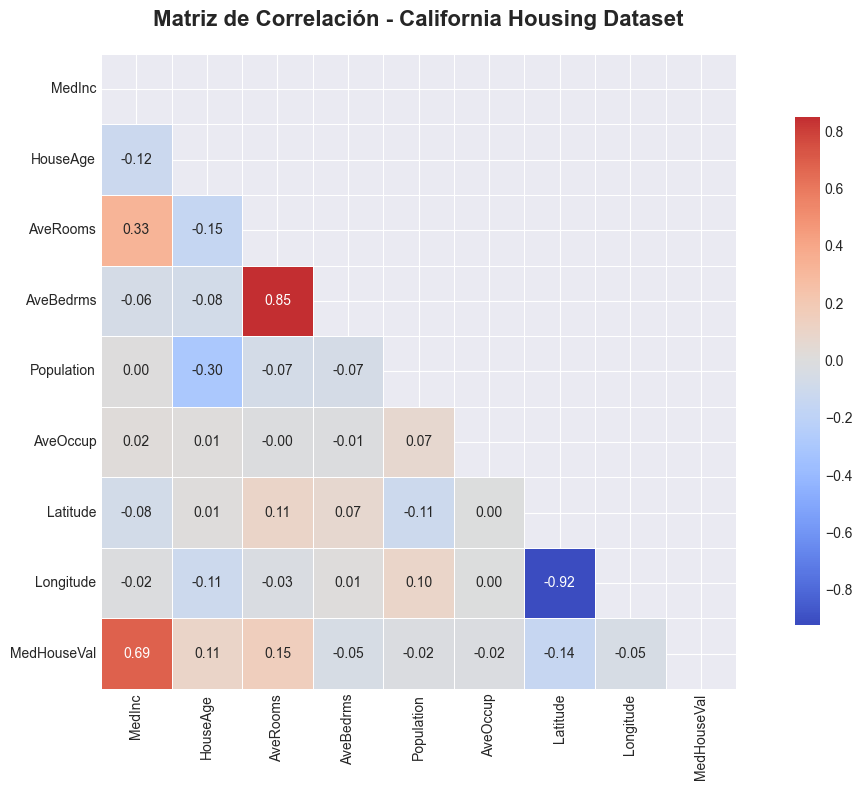

✅ Matriz de correlación guardada en: ../reports/matriz_correlacion.png

🏆 TOP 5 CARACTERÍSTICAS MÁS CORRELACIONADAS CON EL PRECIO:
RELACIÓN CARACTERÍSTICAS vs PRECIO


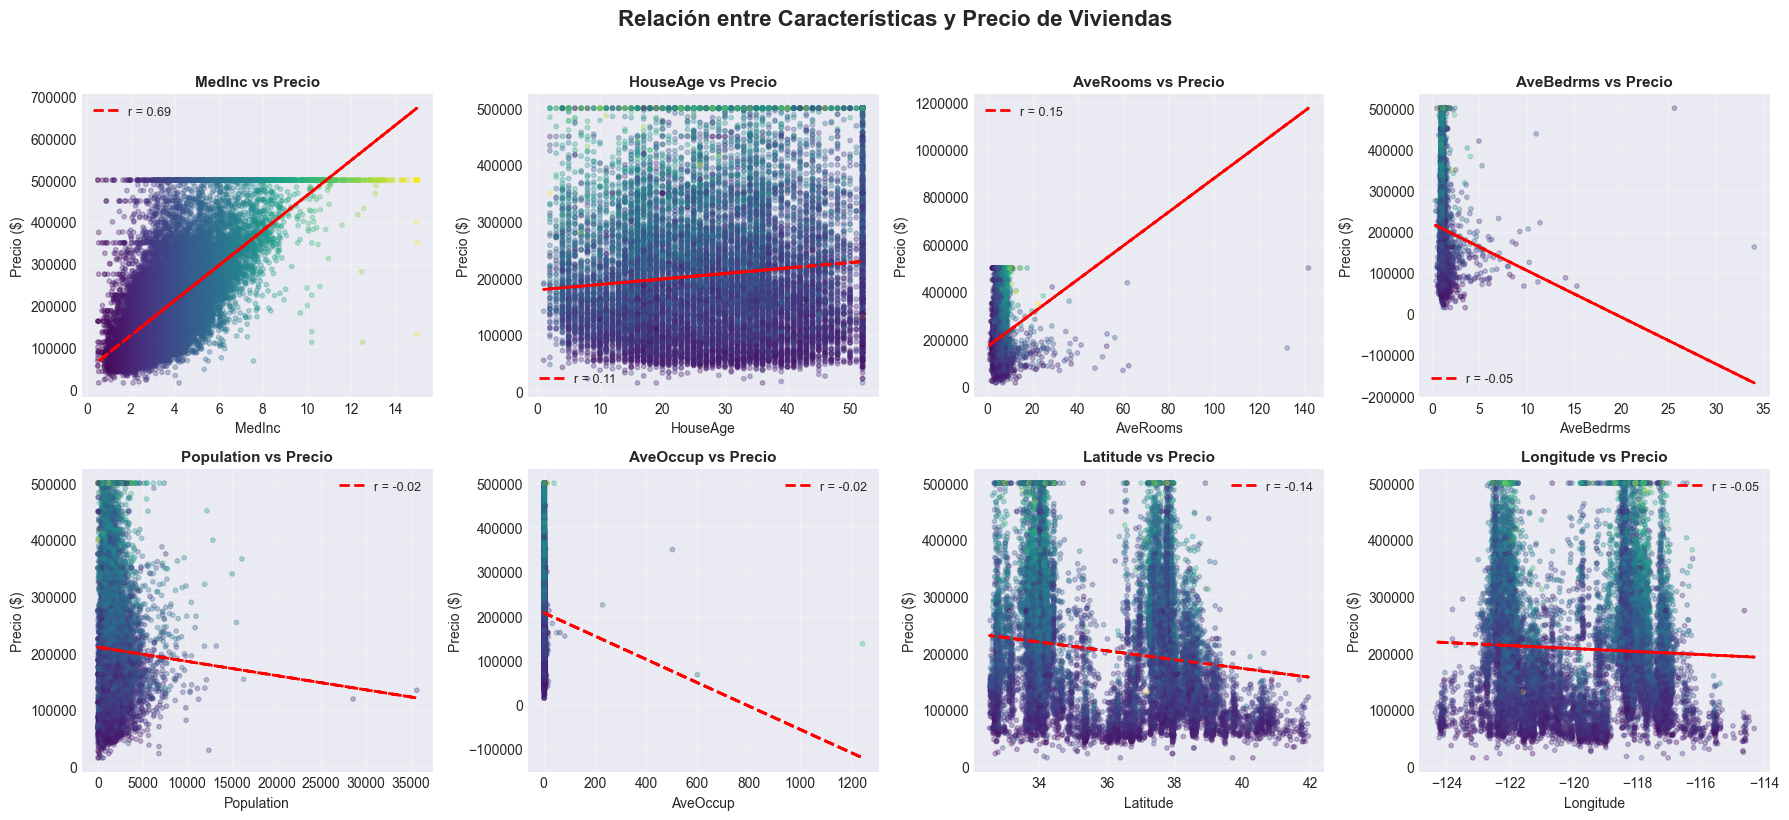

✅ Gráfico de relaciones guardado en: ../reports/relaciones_precio.png
ANÁLISIS GEOGRÁFICO


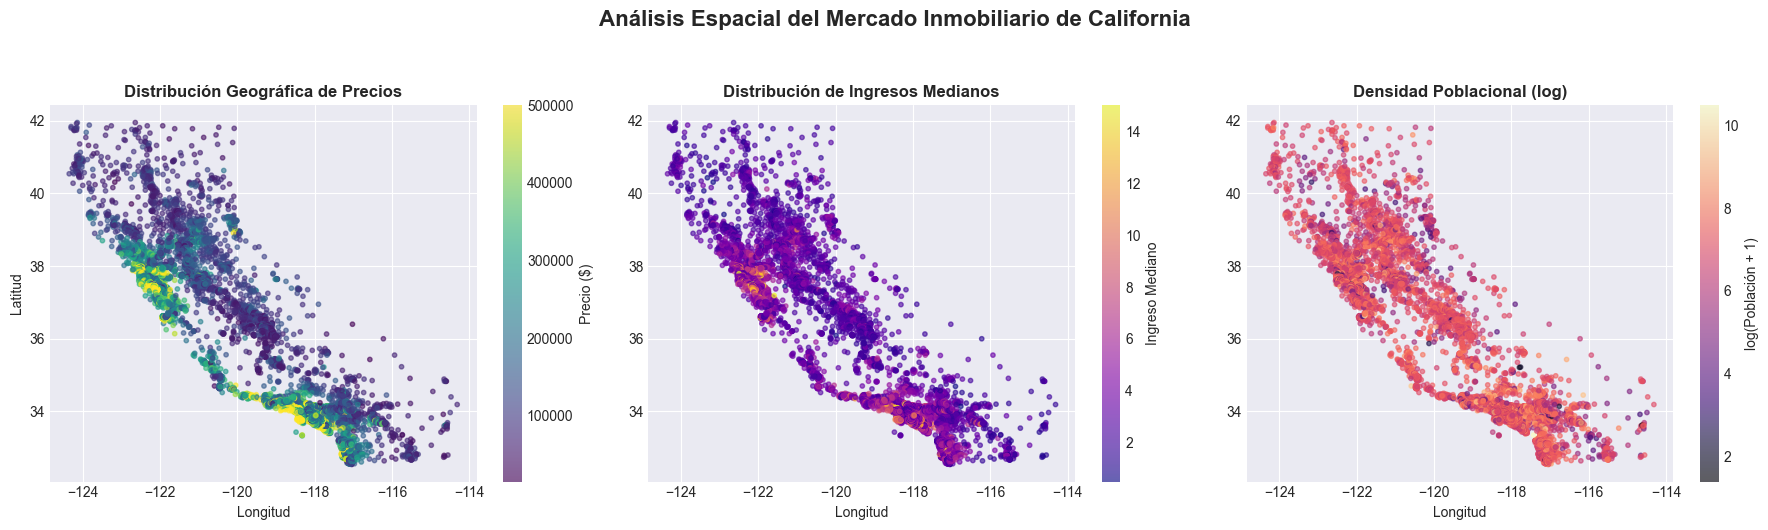

✅ Análisis geográfico guardado en: ../reports/analisis_geografico.png
DETECCIÓN DE OUTLIERS

📊 OUTLIERS POR CARACTERÍSTICA (Método IQR):
--------------------------------------------------

• MedInc:
  Outliers: 681 (3.30%)
  Rango normal: [-0.71, 8.01]

• AveRooms:
  Outliers: 511 (2.48%)
  Rango normal: [2.02, 8.47]

• AveBedrms:
  Outliers: 1,424 (6.90%)
  Rango normal: [0.87, 1.24]

• Population:
  Outliers: 1,196 (5.79%)
  Rango normal: [-620.00, 3132.00]

• AveOccup:
  Outliers: 711 (3.44%)
  Rango normal: [1.15, 4.56]

📋 RESUMEN DE OUTLIERS:
ANÁLISIS DE VARIABLES DERIVADAS

📊 ESTADÍSTICAS DE VARIABLES DERIVADAS:

🔗 CORRELACIÓN CON EL PRECIO:
CONCLUSIONES Y RECOMENDACIONES

🎯 PRINCIPALES HALLAZGOS:
   1. 📈 El dataset contiene 20,640 muestras con 8 características predictivas
   2. 💰 La variable objetivo (MedHouseVal) tiene una distribución sesgada a la derecha
   3. 🔗 MedInc (ingreso mediano) es la característica más correlacionada con el precio (r=0.69)
   4. 🏠 AveRooms muestra a

In [1]:
# %% [markdown]
# # Análisis Exploratorio de Datos - Predicción de Precios de Casas en California
# 
# **Autor:** [Tu Nombre]
# **Fecha:** $(date)
# **Proyecto:** mlops-final-project_1
# 
# ## Objetivo
# Realizar un análisis exploratorio del California Housing Dataset para entender las características y preparar los datos para modelado.

# %% [markdown]
# ## 1. Configuración Inicial

# %%
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import warnings
import os

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configuración de visualización en notebook
%matplotlib inline

# Crear directorios si no existen
os.makedirs('../reports', exist_ok=True)
os.makedirs('../data/raw', exist_ok=True)

print("✅ Librerías importadas y configuradas")

# %% [markdown]
# ## 2. Carga del Dataset

# %%
print("📊 Cargando California Housing Dataset...")

# Descargar dataset
california = fetch_california_housing()

# Crear DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)

# Convertir target a dólares reales (el dataset original está en $100,000s)
df['MedHouseVal'] = california.target * 100000

print(f"✅ Dataset cargado exitosamente")
print(f"• Filas: {df.shape[0]}")
print(f"• Columnas: {df.shape[1]}")
print(f"• Características: {len(california.feature_names)}")

# %% [markdown]
# ## 3. Guardar Dataset Crudo

# %%
# Guardar dataset en formato CSV
raw_path = '../data/raw/california_housing.csv'
df.to_csv(raw_path, index=False)

print(f"💾 Dataset guardado en: {raw_path}")
print(f"📏 Tamaño del archivo: {os.path.getsize(raw_path) / 1024**2:.2f} MB")

# Mostrar primeras filas
print("\n📋 Primeras 5 filas del dataset:")
df.head()

# %% [markdown]
# ## 4. Información General del Dataset

# %%
print("=" * 60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 60)

# Información básica
print(f"\n📊 DIMENSIONES:")
print(f"• Total de registros: {df.shape[0]:,}")
print(f"• Total de características: {df.shape[1]}")

print(f"\n🏷️  CARACTERÍSTICAS:")
for i, feature in enumerate(california.feature_names, 1):
    print(f"  {i}. {feature}")

print(f"\n🎯 VARIABLE OBJETIVO:")
print("  • MedHouseVal: Precio mediano de la casa (en dólares)")

# Información de tipos de datos
print(f"\n📝 TIPOS DE DATOS:")
print(df.dtypes.to_string())

# Información de valores nulos
print(f"\n🔍 VALORES NULOS:")
null_counts = df.isnull().sum()
if null_counts.sum() == 0:
    print("  ✅ No hay valores nulos en el dataset")
else:
    for col, null_count in null_counts[null_counts > 0].items():
        print(f"  • {col}: {null_count} valores nulos")

# %% [markdown]
# ## 5. Estadísticas Descriptivas

# %%
print("=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 60)

# Estadísticas para características
print("\n📈 CARACTERÍSTICAS NUMÉRICAS:")
stats_df = df.describe().T
stats_df = stats_df[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
stats_df.style.format("{:.2f}")

# %%
# Estadísticas específicas para el target
print("\n💵 ESTADÍSTICAS DEL PRECIO (MedHouseVal):")
price_stats = df['MedHouseVal'].describe()
price_stats_formatted = {
    'Count': f"{price_stats['count']:,}",
    'Mean': f"${price_stats['mean']:,.2f}",
    'Std': f"${price_stats['std']:,.2f}",
    'Min': f"${price_stats['min']:,.2f}",
    '25%': f"${price_stats['25%']:,.2f}",
    'Median': f"${price_stats['50%']:,.2f}",
    '75%': f"${price_stats['75%']:,.2f}",
    'Max': f"${price_stats['max']:,.2f}"
}

for stat, value in price_stats_formatted.items():
    print(f"  {stat}: {value}")

# %% [markdown]
# ## 6. Análisis de Distribuciones

# %%
print("=" * 60)
print("ANÁLISIS DE DISTRIBUCIONES")
print("=" * 60)

# Configurar figura
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Variables a graficar (excluyendo lat/lon para histogramas)
plot_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
                 'Population', 'AveOccup', 'MedHouseVal']

for idx, feature in enumerate(plot_features):
    ax = axes[idx]
    
    if feature == 'MedHouseVal':
        # Para precios, usar más bins y color especial
        ax.hist(df[feature], bins=50, edgecolor='black', 
                alpha=0.7, color='salmon')
        ax.set_title(f'Distribución de Precios', fontsize=12, fontweight='bold')
        ax.set_xlabel('Precio ($)')
        ax.ticklabel_format(style='plain', axis='x')
    else:
        ax.hist(df[feature], bins=30, edgecolor='black', alpha=0.7)
        ax.set_title(f'Distribución de {feature}', fontsize=12, fontweight='bold')
        ax.set_xlabel(feature)
    
    ax.set_ylabel('Frecuencia')
    ax.grid(True, alpha=0.3)

# Ocultar ejes vacíos
for idx in range(len(plot_features), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Distribución de Características del Dataset', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Guardar figura
plt.savefig('../reports/distribuciones_caracteristicas.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico de distribuciones guardado en: ../reports/distribuciones_caracteristicas.png")

# %% [markdown]
# ## 7. Análisis de Correlaciones

# %%
print("=" * 60)
print("ANÁLISIS DE CORRELACIONES")
print("=" * 60)

# Calcular matriz de correlación
corr_matrix = df.corr()

print("\n🔗 MATRIZ DE CORRELACIÓN COMPLETA:")
corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1).format("{:.3f}")

# %%
# Heatmap de correlaciones
plt.figure(figsize=(12, 8))

# Crear máscara para el triángulo superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Matriz de Correlación - California Housing Dataset', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()

# Guardar figura
plt.savefig('../reports/matriz_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Matriz de correlación guardada en: ../reports/matriz_correlacion.png")

# %%
# Top correlaciones con el target
print("\n🏆 TOP 5 CARACTERÍSTICAS MÁS CORRELACIONADAS CON EL PRECIO:")
corr_with_target = corr_matrix['MedHouseVal'].abs().sort_values(ascending=False)

top_correlations = corr_with_target[1:6].to_frame('Correlación Absoluta')
top_correlations.style.format("{:.3f}").background_gradient(cmap='Greens')

# %% [markdown]
# ## 8. Relación entre Características y Precio

# %%
print("=" * 60)
print("RELACIÓN CARACTERÍSTICAS vs PRECIO")
print("=" * 60)

# Crear figura
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

features = [col for col in df.columns if col != 'MedHouseVal']

for idx, feature in enumerate(features):
    ax = axes[idx]
    
    # Scatter plot
    scatter = ax.scatter(df[feature], df['MedHouseVal'], 
                         alpha=0.3, s=10, c=df['MedInc'], cmap='viridis')
    
    # Línea de tendencia
    z = np.polyfit(df[feature], df['MedHouseVal'], 1)
    p = np.poly1d(z)
    ax.plot(df[feature], p(df[feature]), "r--", linewidth=2, 
            label=f"r = {df[feature].corr(df['MedHouseVal']):.2f}")
    
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Precio ($)', fontsize=10)
    ax.set_title(f'{feature} vs Precio', fontsize=11, fontweight='bold')
    ax.ticklabel_format(style='plain', axis='y')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

# Ajustar layout
plt.suptitle('Relación entre Características y Precio de Viviendas', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Guardar figura
plt.savefig('../reports/relaciones_precio.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico de relaciones guardado en: ../reports/relaciones_precio.png")

# %% [markdown]
# ## 9. Análisis Geográfico

# %%
print("=" * 60)
print("ANÁLISIS GEOGRÁFICO")
print("=" * 60)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Mapa de precios
scatter1 = axes[0].scatter(df['Longitude'], df['Latitude'], 
                          c=df['MedHouseVal'], 
                          cmap='viridis', 
                          alpha=0.6, 
                          s=10)
axes[0].set_xlabel('Longitud')
axes[0].set_ylabel('Latitud')
axes[0].set_title('Distribución Geográfica de Precios', fontweight='bold')
plt.colorbar(scatter1, ax=axes[0], label='Precio ($)')

# 2. Mapa de ingresos
scatter2 = axes[1].scatter(df['Longitude'], df['Latitude'], 
                          c=df['MedInc'], 
                          cmap='plasma', 
                          alpha=0.6, 
                          s=10)
axes[1].set_xlabel('Longitud')
axes[1].set_title('Distribución de Ingresos Medianos', fontweight='bold')
plt.colorbar(scatter2, ax=axes[1], label='Ingreso Mediano')

# 3. Mapa de densidad poblacional (log scale)
scatter3 = axes[2].scatter(df['Longitude'], df['Latitude'], 
                          c=np.log1p(df['Population']), 
                          cmap='magma', 
                          alpha=0.6, 
                          s=10)
axes[2].set_xlabel('Longitud')
axes[2].set_title('Densidad Poblacional (log)', fontweight='bold')
plt.colorbar(scatter3, ax=axes[2], label='log(Población + 1)')

plt.suptitle('Análisis Espacial del Mercado Inmobiliario de California', 
             fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()

# Guardar figura
plt.savefig('../reports/analisis_geografico.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Análisis geográfico guardado en: ../reports/analisis_geografico.png")

# %% [markdown]
# ## 10. Detección de Outliers

# %%
print("=" * 60)
print("DETECCIÓN DE OUTLIERS")
print("=" * 60)

# Método IQR para detección de outliers
outliers_summary = {}

print("\n📊 OUTLIERS POR CARACTERÍSTICA (Método IQR):")
print("-" * 50)

features_for_outliers = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

for feature in features_for_outliers:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outliers_percentage = (len(outliers) / len(df)) * 100
    
    outliers_summary[feature] = {
        'Outliers': len(outliers),
        'Porcentaje': f"{outliers_percentage:.2f}%",
        'Límite Inferior': f"{lower_bound:.2f}",
        'Límite Superior': f"{upper_bound:.2f}"
    }
    
    print(f"\n• {feature}:")
    print(f"  Outliers: {len(outliers):,} ({outliers_percentage:.2f}%)")
    print(f"  Rango normal: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Crear DataFrame de resumen
outliers_df = pd.DataFrame(outliers_summary).T
print("\n📋 RESUMEN DE OUTLIERS:")
outliers_df

# %% [markdown]
# ## 11. Análisis de Variables Categóricas Implícitas

# %%
print("=" * 60)
print("ANÁLISIS DE VARIABLES DERIVADAS")
print("=" * 60)

# Crear algunas variables derivadas para análisis
df_derived = df.copy()

# Ratio de habitaciones por dormitorio
df_derived['Room_Bed_Ratio'] = df_derived['AveRooms'] / df_derived['AveBedrms']

# Densidad de personas por habitación
df_derived['People_per_Room'] = df_derived['AveOccup'] / df_derived['AveRooms']

# Ingreso per cápita aproximado
df_derived['Income_per_Person'] = df_derived['MedInc'] / df_derived['AveOccup']

print("\n📊 ESTADÍSTICAS DE VARIABLES DERIVADAS:")
derived_stats = df_derived[['Room_Bed_Ratio', 'People_per_Room', 'Income_per_Person']].describe()
derived_stats.style.format("{:.2f}")

# Correlación de variables derivadas con el precio
print("\n🔗 CORRELACIÓN CON EL PRECIO:")
derived_corr = df_derived[['Room_Bed_Ratio', 'People_per_Room', 'Income_per_Person', 'MedHouseVal']].corr()
derived_corr['MedHouseVal'].sort_values(ascending=False).to_frame('Correlación')

# %% [markdown]
# ## 12. Conclusiones del EDA

# %%
print("=" * 60)
print("CONCLUSIONES Y RECOMENDACIONES")
print("=" * 60)

print("\n🎯 PRINCIPALES HALLAZGOS:")

conclusiones = [
    "1. 📈 El dataset contiene 20,640 muestras con 8 características predictivas",
    "2. 💰 La variable objetivo (MedHouseVal) tiene una distribución sesgada a la derecha",
    "3. 🔗 MedInc (ingreso mediano) es la característica más correlacionada con el precio (r=0.69)",
    "4. 🏠 AveRooms muestra alta correlación positiva con el precio",
    "5. 📍 Las variables geográficas (Latitude, Longitude) muestran patrones espaciales claros",
    "6. ⚠️ Algunas características tienen outliers significativos que requieren tratamiento",
    "7. 📊 No hay valores nulos en el dataset",
    "8. 🔄 Las escalas de las variables son diferentes, requiere normalización"
]

for conclusion in conclusiones:
    print(f"   {conclusion}")

print("\n💡 RECOMENDACIONES PARA PREPROCESAMIENTO:")

recomendaciones = [
    "1. Escalar todas las características (StandardScaler recomendado)",
    "2. Considerar transformación logarítmica para el target si mejora la distribución",
    "3. Tratar outliers usando winsorization o eliminación según el contexto",
    "4. Crear variables derivadas como Room_Bed_Ratio y People_per_Room",
    "5. Considerar interacciones entre características (ej: MedInc × Latitude)",
    "6. Evaluar la necesidad de reducción de dimensionalidad",
    "7. Implementar validación cruzada estratificada por rangos de precio"
]

for i, recomendacion in enumerate(recomendaciones, 1):
    print(f"   {i}. {recomendacion}")

print("\n🤖 RECOMENDACIONES PARA MODELADO:")

modelado_recomendaciones = [
    "Algoritmos que manejen bien relaciones no lineales: Random Forest, XGBoost",
    "Considerar modelos ensemble para mejorar precisión",
    "Evaluar modelos de regresión regularizada para evitar overfitting",
    "Probar redes neuronales si los datos lo permiten"
]

for rec in modelado_recomendaciones:
    print(f"   • {rec}")

# %% [markdown]
# ## 13. Guardar Reporte de Análisis

# %%
# Crear reporte en formato texto
reporte_path = '../reports/eda_report.txt'

with open(reporte_path, 'w') as f:
    f.write("=" * 60 + "\n")
    f.write("REPORTE DE ANÁLISIS EXPLORATORIO DE DATOS\n")
    f.write("=" * 60 + "\n\n")
    
    f.write("PROYECTO: mlops-final-project_1\n")
    f.write("DATASET: California Housing\n")
    f.write(f"FECHA: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
    
    f.write("1. RESUMEN DEL DATASET:\n")
    f.write(f"   • Muestras totales: {df.shape[0]:,}\n")
    f.write(f"   • Características: {df.shape[1] - 1}\n")
    f.write(f"   • Variable objetivo: MedHouseVal (precio en $)\n\n")
    
    f.write("2. CALIDAD DE DATOS:\n")
    f.write("   • Valores nulos: 0\n")
    f.write("   • Duplicados: 0\n")
    f.write("   • Tipos de datos: Todos numéricos\n\n")
    
    f.write("3. CORRELACIONES CON EL PRECIO:\n")
    for feature, corr in corr_with_target[1:].items():
        f.write(f"   • {feature}: {corr:.3f}\n")
    
    f.write("\n4. OUTLIERS DETECTADOS:\n")
    for feature, stats in outliers_summary.items():
        f.write(f"   • {feature}: {stats['Outliers']} ({stats['Porcentaje']})\n")
    
    f.write("\n5. GRÁFICOS GENERADOS:\n")
    f.write("   • distribuciones_caracteristicas.png\n")
    f.write("   • matriz_correlacion.png\n")
    f.write("   • relaciones_precio.png\n")
    f.write("   • analisis_geografico.png\n")

print(f"📄 Reporte de EDA guardado en: {reporte_path}")
print("✅ Análisis Exploratorio de Datos COMPLETADO exitosamente!")

# %%
# Mensaje final
print("\n" + "=" * 60)
print("🎉 EDA COMPLETADO EXITOSAMENTE")
print("=" * 60)
print("\nPróximos pasos:")
print("1. 📓 Ejecutar notebook de experimentación (02_experimentacion.ipynb)")
print("2. 🔧 Ejecutar scripts de preparación de datos (src/data_preparation.py)")
print("3. 🤖 Entrenar modelo (src/train.py)")
print("4. 🌐 Desplegar API (src/api/app.py)")